# VBOOK workflow proposal
Quick introduction to the workflow and tools for vbook.
## Capture
Webcrawl scraper of book text and images into the initial canonical format.
### Agent: Vacuum
### Inputs: sources from book depository such as Gutenberg
### Process:
### Outputs: 
1. vbook database, including author, title, data of publication, subject matter tags, source URL, repository links
1. source html repository, 
1. source txt repository
1. source images repository
## Analysis
Generation of elements required for production 
### Agent: Grist
### Inputs
Database and repository from capture phase
### Process:
1. SSML markup with phonetic pronunciation disambiguated using nltk and wordnet
1. Timeline generation for coordination of performance elements. Example, when to display captions, avatar synchronization, image display start / end. This requires a custom format edit list which has all of the queues and sequences captured for playback at product generation time. Special editor tool for the .vbk timeline representation similar to DAW.
1. Avatar generation
1. Avatar facial/emotion mapping
1. Semantic analysis for ontological entities.  Example, proper names such as Abraham Lincoln, place names such as London. The ontological database shall have concordance with the vbook timeline. This enables synthetic footnotes and essays
1. Scene analysis: virtual imagination of the wordscape.
1. Voice generation: custom voice matching the Avatar mapped from the author.
1. Audio mixing for sound effects, background music. ATMOS support for 3D/VR presentation.     
### Outputs:
1. project timeline (.vbk) file in JSON or XML format
2. SSML rendered to audio file using the avatar voice.
3. Avatar animations, expressions and phonemene deformations on the timeline for synchronized playback.
4. Image elements positioned on the timeline. Animations, fades.
5. Game engine playback of vbook for streaming requires a game project which implements the timeline playback.  Game engine also implements the controls for playback (similar to video controls). This allows user controls for footnotes, query of specific phrases and other web searches while the vbook is paused. Tools for capture of 'vbibliographic' references: vbook timeline position with reverse map to source book html and source book pagination.
## Post Production
Putting it all together into vbook products
1. vbook 2D video
1. vbook 3D/VR video
1. vbook audio only
These consist of codec captures of vbook game playthrough. HD, 4k, 8k formats.
Some ultra high resolution renders may be enabled when rendering offline from the game engine. 
## Generation of Performances
Game engine playback of timeline
### Distribtion of Products
Making vbook accessible to public
1. VBOOK site: streaming vbook products
2. VBOOK reader: for offline
3. Licensing issues (gutenberg wants 20% of profits after tax)
## Futures
1. Other languages -- e.g. Chinese
2. historical chronology mapping of vbook timeline
3. google earth integration
4. historical maps
5. Footnote handling -- for the active control case (gameengine) and for passive render to video.
6. Vbook control using voice commands
7. clients for Apple, Android phones + VR headsets
8. Browse virtual library (3d VR)
9. Interrupt avatar and converse -- personalityBOT that will answer according to the lights prevailing as defined by era, opinons already expressed by the author. Personality mapping to avatar.
10. Age progression, regression for avatar (physical and audible)
11. Deepfake and FakeTTS mapping to the avatar
12. virtualization of the word picture that applies based on context. This might appear as a 'play' with characters, with a scenic backdrop; a mind-map showing icons for the main subjects of a presentation; a stream of consciousness rapid display of images (see KaizaStudios Flambent) relevant to the current word picture.


In [22]:
# start pf scrapbook of techniques for the VACUUM agent


            
## Prototype for scrape to SSHTML and ontological database

### beautiful soup implementation

# TODO List
## Items to handle with special speech markup:<br>
class="__blockquot__"

## Features
1. Names and places to database
1. Scrape dynamic html to .txt with SSML markup
1. lexical analyze proper names (geo, bio) to database1. establish reference system so that any given word, sentence is known on a timeline
1. images harvest from html scrape to image database
1. insert images in VBook on timeline
1. database ORM independent of db implementation (sqllite etc)
1. semantic wev scrape for ontological db entities
1. google map support
1. avatar generation using deepfakes
1. avatar voice generation using TTS scrapes
1. avatar expression generation using NVIDIA omniverse tools
1. cover generation if synthetic -- preserve orignal covers. Use AI to discriminate between these, detect TRANSCRIBER, GUTENBERG etc to see falsies
1. Text in a poem, extended quotation -- specifically marked out in the original text -- should be displayed in a page reproduction in the vbook.  This calls for a 'page reproduction to texture' feature (could just be a web browser output scrolled to the current view). Becauses the visual structure of the book, including fonts, italics, marginal notations, illustrations, special illustrated letters for start of chapter, etc. are part of the book experience. This suggests a simple page turning mode in the video that would stay as faithful to the original reading experience.
1. Footnote handling as noted earlier.
1. Link verification a-priori since some links are obsolete.
1. Skip ahead function or omit function so that boring lists do not go the the final product.  
<br><br>



## Load subject page

In [23]:
import requests

URL = 'https://gutenberg.org/cache/epub/29494/pg29494-images.html'
# 'https://gutenberg.org/cache/epub/67699/pg67699-images.html'
# 'https://gutenberg.org/cache/epub/54653/pg54653-images.html'


#'https://gutenberg.org/cache/epub/29494/pg29494-images.html'
page = requests.get(URL)

print(page.text)


<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8"><style>
#pg-header div, #pg-footer div {
    all: initial;
    display: block;
    margin-top: 1em;
    margin-bottom: 1em;
    margin-left: 2em;
}
#pg-footer div.agate {
    font-size: 90%;
    margin-top: 0;
    margin-bottom: 0;
    text-align: center;
}
#pg-footer li {
    all: initial;
    display: block;
    margin-top: 1em;
    margin-bottom: 1em;
    text-indent: -0.6em;
}
#pg-footer div.secthead {
    font-size: 110%;
    font-weight: bold;
}
#pg-footer #project-gutenberg-license {
    font-size: 110%;
    margin-top: 0;
    margin-bottom: 0;
    text-align: center;
}
#pg-header-heading {
    all: inherit;
    text-align: center;
    font-size: 110%;
}
#pg-footer-heading {
    all: inherit;
    text-align: center;
    font-size: 120%;
    font-weight: normal;
    margin-top: 0;
    margin-bottom: 0;
}
#pg-header #pg-machine-header p {
    text-indent: -4em;
    padding-left: 4em;
    margin-top: 1em;
}
#pg-header #p

In [24]:
from urllib.parse import urlparse
urlParts = urlparse(URL)
print (repr(urlParts))
print (f"Path is  {urlParts.path}")
components = urlParts.path.split('/')
rootPart = "/"
print (f"Elements: {components}")
components.pop() # remove last element
print (f"Elements: {components}")
components.pop(0) # remove the inexplicable blank element at start of list
print (f"Elements: {components}")
for element in components:
    rootPart = rootPart + element + '/'
rootURL = f'{urlParts.scheme}://{urlParts.netloc}{rootPart}'
print (f"rootURL: {rootURL}")

ParseResult(scheme='https', netloc='gutenberg.org', path='/cache/epub/29494/pg29494-images.html', params='', query='', fragment='')
Path is  /cache/epub/29494/pg29494-images.html
Elements: ['', 'cache', 'epub', '29494', 'pg29494-images.html']
Elements: ['', 'cache', 'epub', '29494']
Elements: ['cache', 'epub', '29494']
rootURL: https://gutenberg.org/cache/epub/29494/


## Use async requests-html which renders javascript

In [25]:
from requests_html import AsyncHTMLSession
asession = AsyncHTMLSession()
r = await asession.get(URL)
    

## Parse to structure
1. r.html.links contains all links. Scan these for .jpg, .png etc along with timeline / position info
1. r.content contains the raw html text
1. r.text is content without html markup


In [26]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(r.content, 'html5lib')
print (soup)



<!DOCTYPE html>
<html lang="en"><head>
<meta charset="utf-8"/><style>
#pg-header div, #pg-footer div {
    all: initial;
    display: block;
    margin-top: 1em;
    margin-bottom: 1em;
    margin-left: 2em;
}
#pg-footer div.agate {
    font-size: 90%;
    margin-top: 0;
    margin-bottom: 0;
    text-align: center;
}
#pg-footer li {
    all: initial;
    display: block;
    margin-top: 1em;
    margin-bottom: 1em;
    text-indent: -0.6em;
}
#pg-footer div.secthead {
    font-size: 110%;
    font-weight: bold;
}
#pg-footer #project-gutenberg-license {
    font-size: 110%;
    margin-top: 0;
    margin-bottom: 0;
    text-align: center;
}
#pg-header-heading {
    all: inherit;
    text-align: center;
    font-size: 110%;
}
#pg-footer-heading {
    all: inherit;
    text-align: center;
    font-size: 120%;
    font-weight: normal;
    margin-top: 0;
    margin-bottom: 0;
}
#pg-header #pg-machine-header p {
    text-indent: -4em;
    padding-left: 4em;
    margin-top: 1em;
}
#pg-header #p

## thoughts on timeline
Use sourceline and sourcepos to track an elements relative position in the timelined based on the original document structure.<br>

Here we refer to the VBook timeline which establishes a bidirectional mapping between source document and extracted elements.  The source document should be translatable between the HTML version and a raw text version of some canonical format.<br><br>
This timeline mapping function can be used to display captions in a video, illustrations from a book into the Vbook presentation at the right time and for the right duration; at a relevant trigger time not the sequential order of the original book.<br><br>
Another application of the timeline is synchronization of CG selements such as an avatar.  The phonemes of the spoken text must map to expressions and deformations of the avatar mesh.<br><br>
The timeline structure should be flexible to map historical chronology (events) into sequence.  A generalized requirement is to establish event synchronization to a timeline.  A chronological timeline of history should be anchored on anchor events with a conventional historical date; a vbook timeline should be based on terminal events, relative to the start of the vbook entity playback.<br><br>

In the vbook case, anchors could be estasblished with the regard to phoneme, since this seems to be the smallest granular event useful for purposes of mesh animation. However an anchor could be established with regard to start of a word, a sentence, a paragraph, etc structures. As long as a concordance or two way mapping function exists between the different anchors (T(start) + Delta(t) expressed as time).<br>
<br>
For vbook applications, phonemene start and end timing is key, where silence can be inferred from successive phonemes. E1.start - E0.end<br><br> 

## Make file names windows compatible
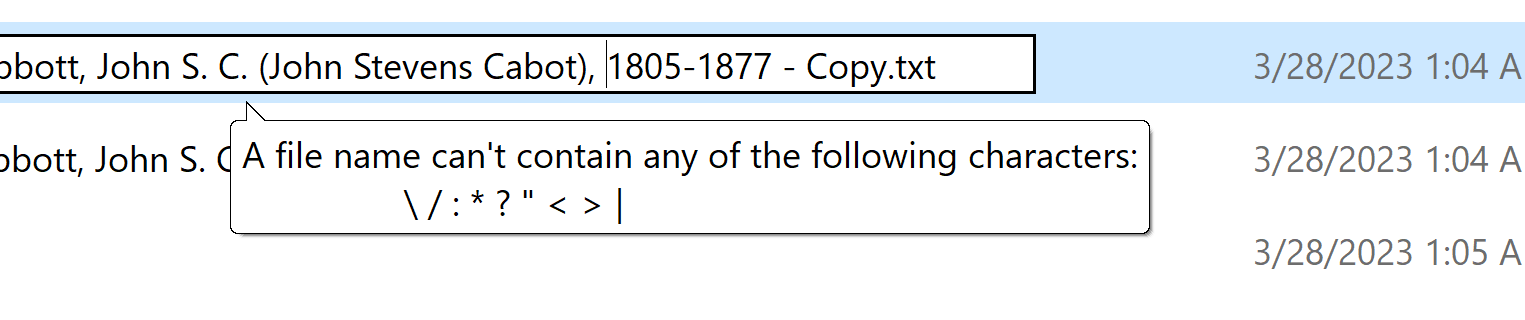



In [27]:
import html

def metaPrint(obj, attrib, name):
    nugget = obj[attrib]
    print(f"---> '{name}' is: '{nugget}")
    unes = html.unescape(nugget)
    unes = unes.replace('\n', ' -- ')
    unes = unes.replace('\\',' ')
    unes = unes.replace('/',' ')
    unes = unes.replace(':',' -- ')
    unes = unes.replace('*',' ')
    unes = unes.replace('?',' ')
    unes = unes.replace('"',' ')
    unes = unes.replace("'",'')
    unes = unes.replace('<',' ')
    unes = unes.replace('>',' ')
    unes = unes.replace('|',' ')
    print(f"unescaped: {unes}")
    print(f"---> at sourceline({obj.sourceline}) pos({obj.sourcepos})\n")
    return unes

bookTitle = "book-not-found"
bookAuthor = "author-not-found"

metas = soup.find_all('meta')
for meta in metas:
    try:
        meta_name = meta['name']
        if (meta_name == 'dc.subject'):
            metaPrint(meta, 'content', 'Subject')
            #print(f"Subject is: {meta['content']} at sourcline {meta.sourceline}")
        elif (meta_name == 'dc.creator'):
            bookAuthor = metaPrint(meta, 'content', 'Creator')
            print(f'bookAuthor: {bookAuthor}')
            #print(f"Creator: {meta['content']}")
        elif (meta_name == 'dc.title'):
            bookTitle = metaPrint(meta, 'content', 'Title')
            print(f"Title: {bookTitle}")
        elif (meta_name == 'og.title'):
            metaPrint(meta, 'content', 'OgTitle')            
            #print(f"OgTitle: {meta['content']}")
        elif (meta_name == 'dc.subject'):
            metaPrint(meta, 'content', 'Subject')            
            #print(f"Subject: {meta['content']}")        
    except:
        pass

    try:
        meta_property = meta['property']
        if (meta_property == 'og:url'):
            metaPrint(meta, 'content', 'URL')            
            #print(f"URL: {meta['content']}")
        if (meta_property == 'og:image'):
            metaPrint(meta, 'content', 'Image')            
            #print(f"Image URL: {meta['content']}")
    except:
        pass

print(f'bookTitle: {bookTitle}\nbookAuthor: {bookAuthor}')

---> 'Title' is: 'King Philip&#10;Makers of History
unescaped: King Philip -- Makers of History
---> at sourceline(263) pos(69)

Title: King Philip -- Makers of History
---> 'Creator' is: 'Abbott, John S. C. (John Stevens Cabot), 1805-1877
unescaped: Abbott, John S. C. (John Stevens Cabot), 1805-1877
---> at sourceline(269) pos(84)

bookAuthor: Abbott, John S. C. (John Stevens Cabot), 1805-1877
---> 'Subject' is: 'King Philip's War, 1675-1676
unescaped: King Philips War, 1675-1676
---> at sourceline(270) pos(62)

---> 'Subject' is: 'Indians of North America -- Biography
unescaped: Indians of North America -- Biography
---> at sourceline(271) pos(71)

---> 'Subject' is: 'Philip, Sachem of the Wampanoags, -1676
unescaped: Philip, Sachem of the Wampanoags, -1676
---> at sourceline(272) pos(73)

---> 'Subject' is: 'New England -- History -- Colonial period, ca. 1600-1775
unescaped: New England -- History -- Colonial period, ca. 1600-1775
---> at sourceline(273) pos(90)

---> 'URL' is: 'htt

In [28]:
#print (f">>>>>>>>>>>>>>> CHILDREN >>>>>>>>>>>")
#for child in soup.html.body:
#    print(child.name) 

# only body for content
# extract the class=pagenum to preserve pagination
# remove the same from the body
# extract hrefs to image links
# remove the anchors from the body
# what's left should be text
import re

body = soup.find_all('body')

print('\n\nThis fetches all page markers')
pageRe = re.compile("page[ivxld0-9].*")
numberRe = re.compile("\[([ivxld0-9].*)\]")
anchors = soup.find_all('a', id = pageRe)
for anchor in anchors:
    pageMatch = numberRe.match(anchor.string)
    page_num = pageMatch.group(1)
    print(f"{repr(anchor)} -> {page_num} on sourceline {anchor.sourceline} position {anchor.sourcepos}")





This fetches all page markers


# Images and Figures
## Image urls
1. a href and img src elements have image urls. Harvest these using the methods below.
1. need to convert https://gutenberg.org/cache/epub/54653/images/dp607_pg511b.png from images/dp607_pg511b.png <br>
1. where can we find the prefix of this url? <br>
We have the URL apriori: 'https://gutenberg.org/cache/epub/54653/pg54653-images.html'<br>
So the images directory is same level as the source document<p>
1. Use the _rootURL_ variable initialized above. <br>
https://gutenberg.org/cache/epub/54653/
## Captions and Figures
One structure used consists of<br>
div(class:figright[img+src,div(class:caption)])<br>
In other words a div without an anchor+href
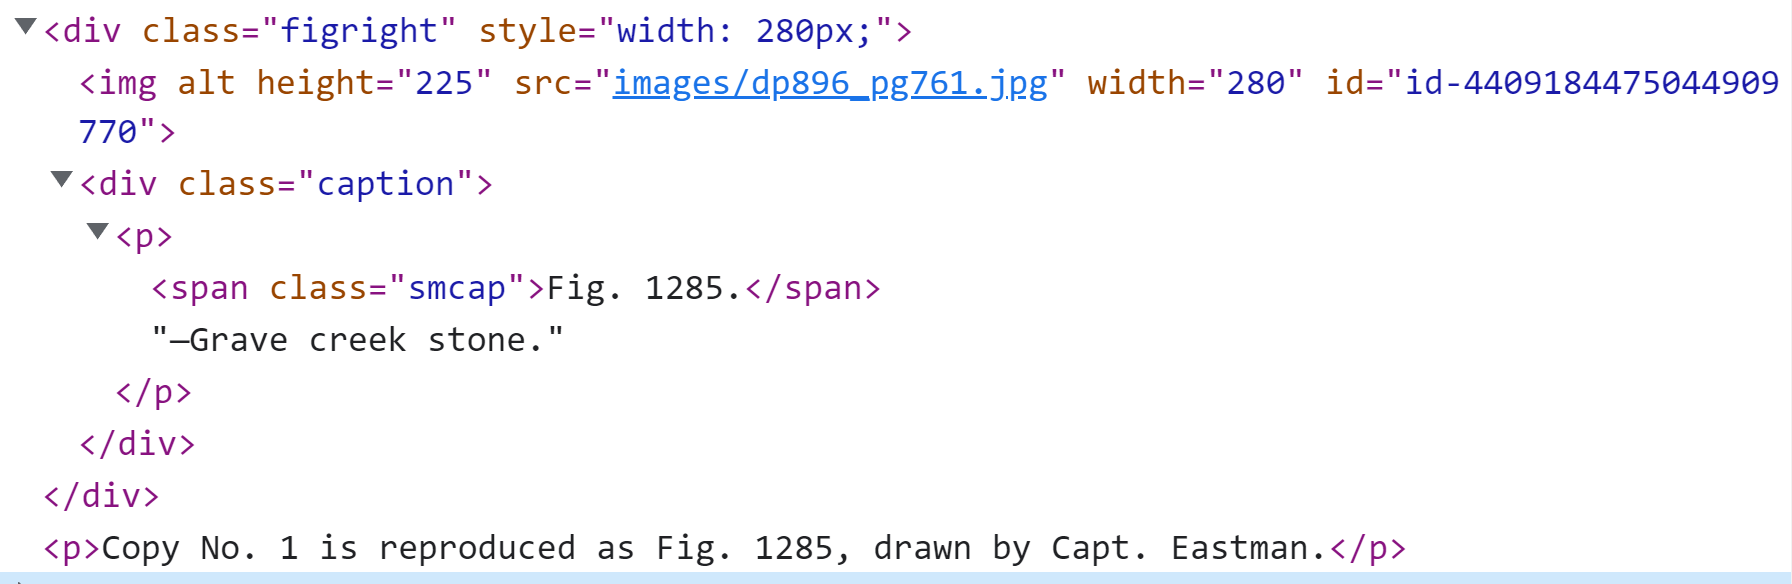
A variant of figright has multiple img
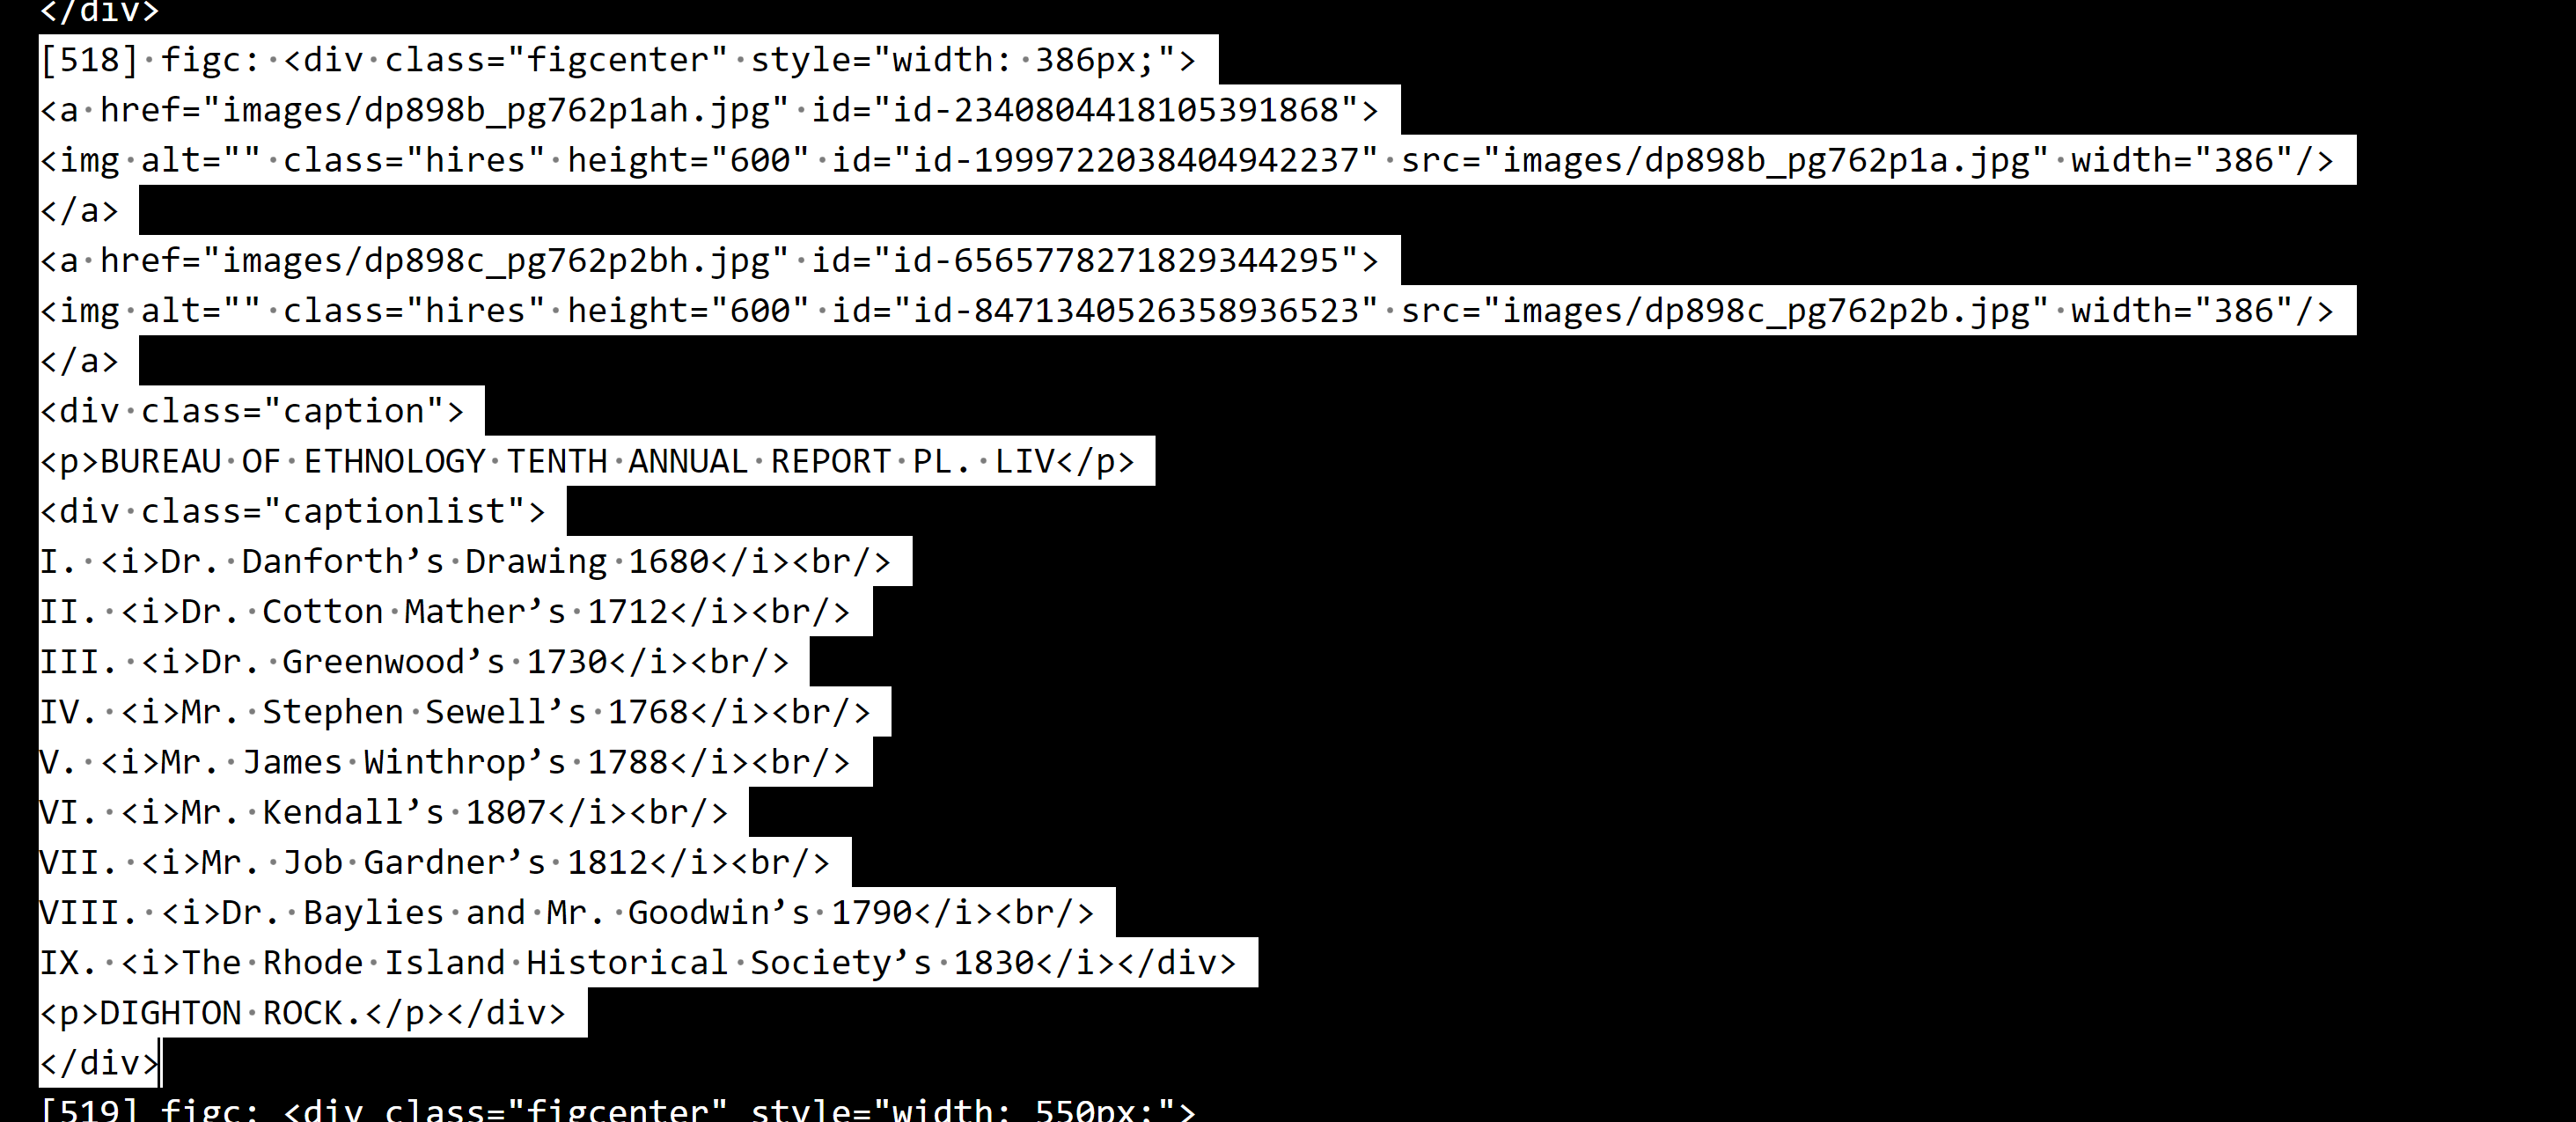
1. Another structure<br>
div(class:figcenter[a(href[img(src)),div(class:caption)])<br>
Here the div has an anchor+href with img+src inside.
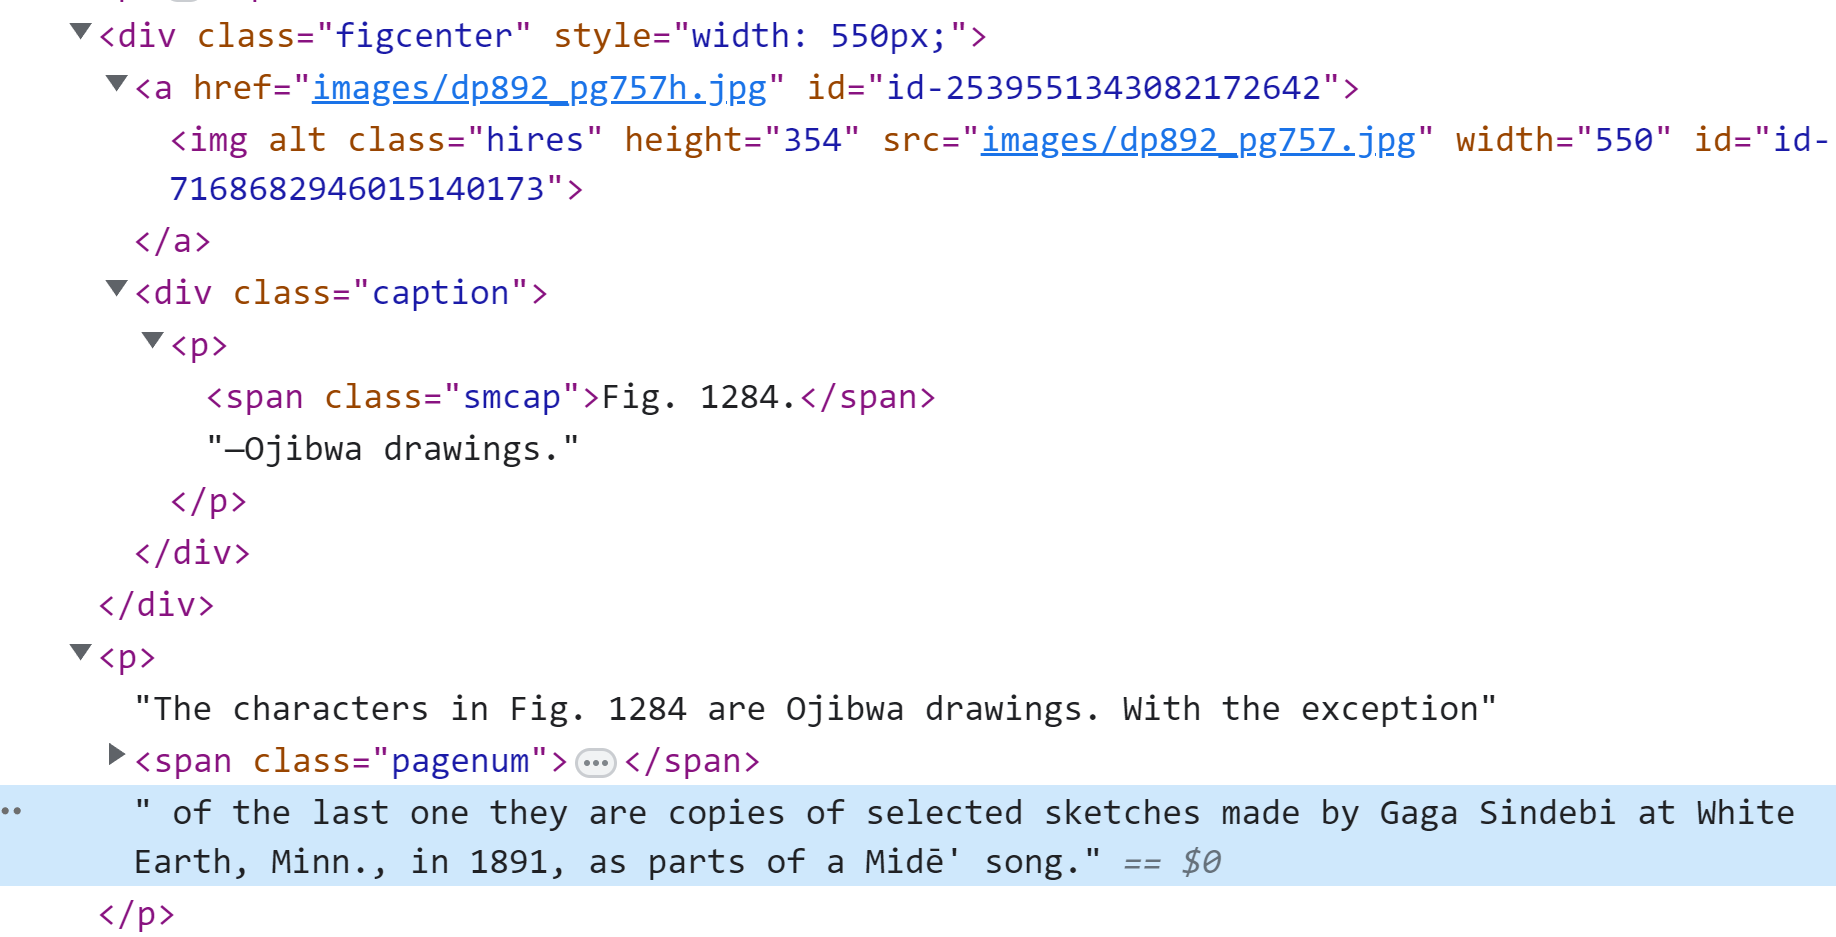
Note the nesting of a+href with img+src elements here.  The final timeline should avoid duplicates.<br>
There will certainly be other use cases.<br>
A variant has a caption with multiple items:
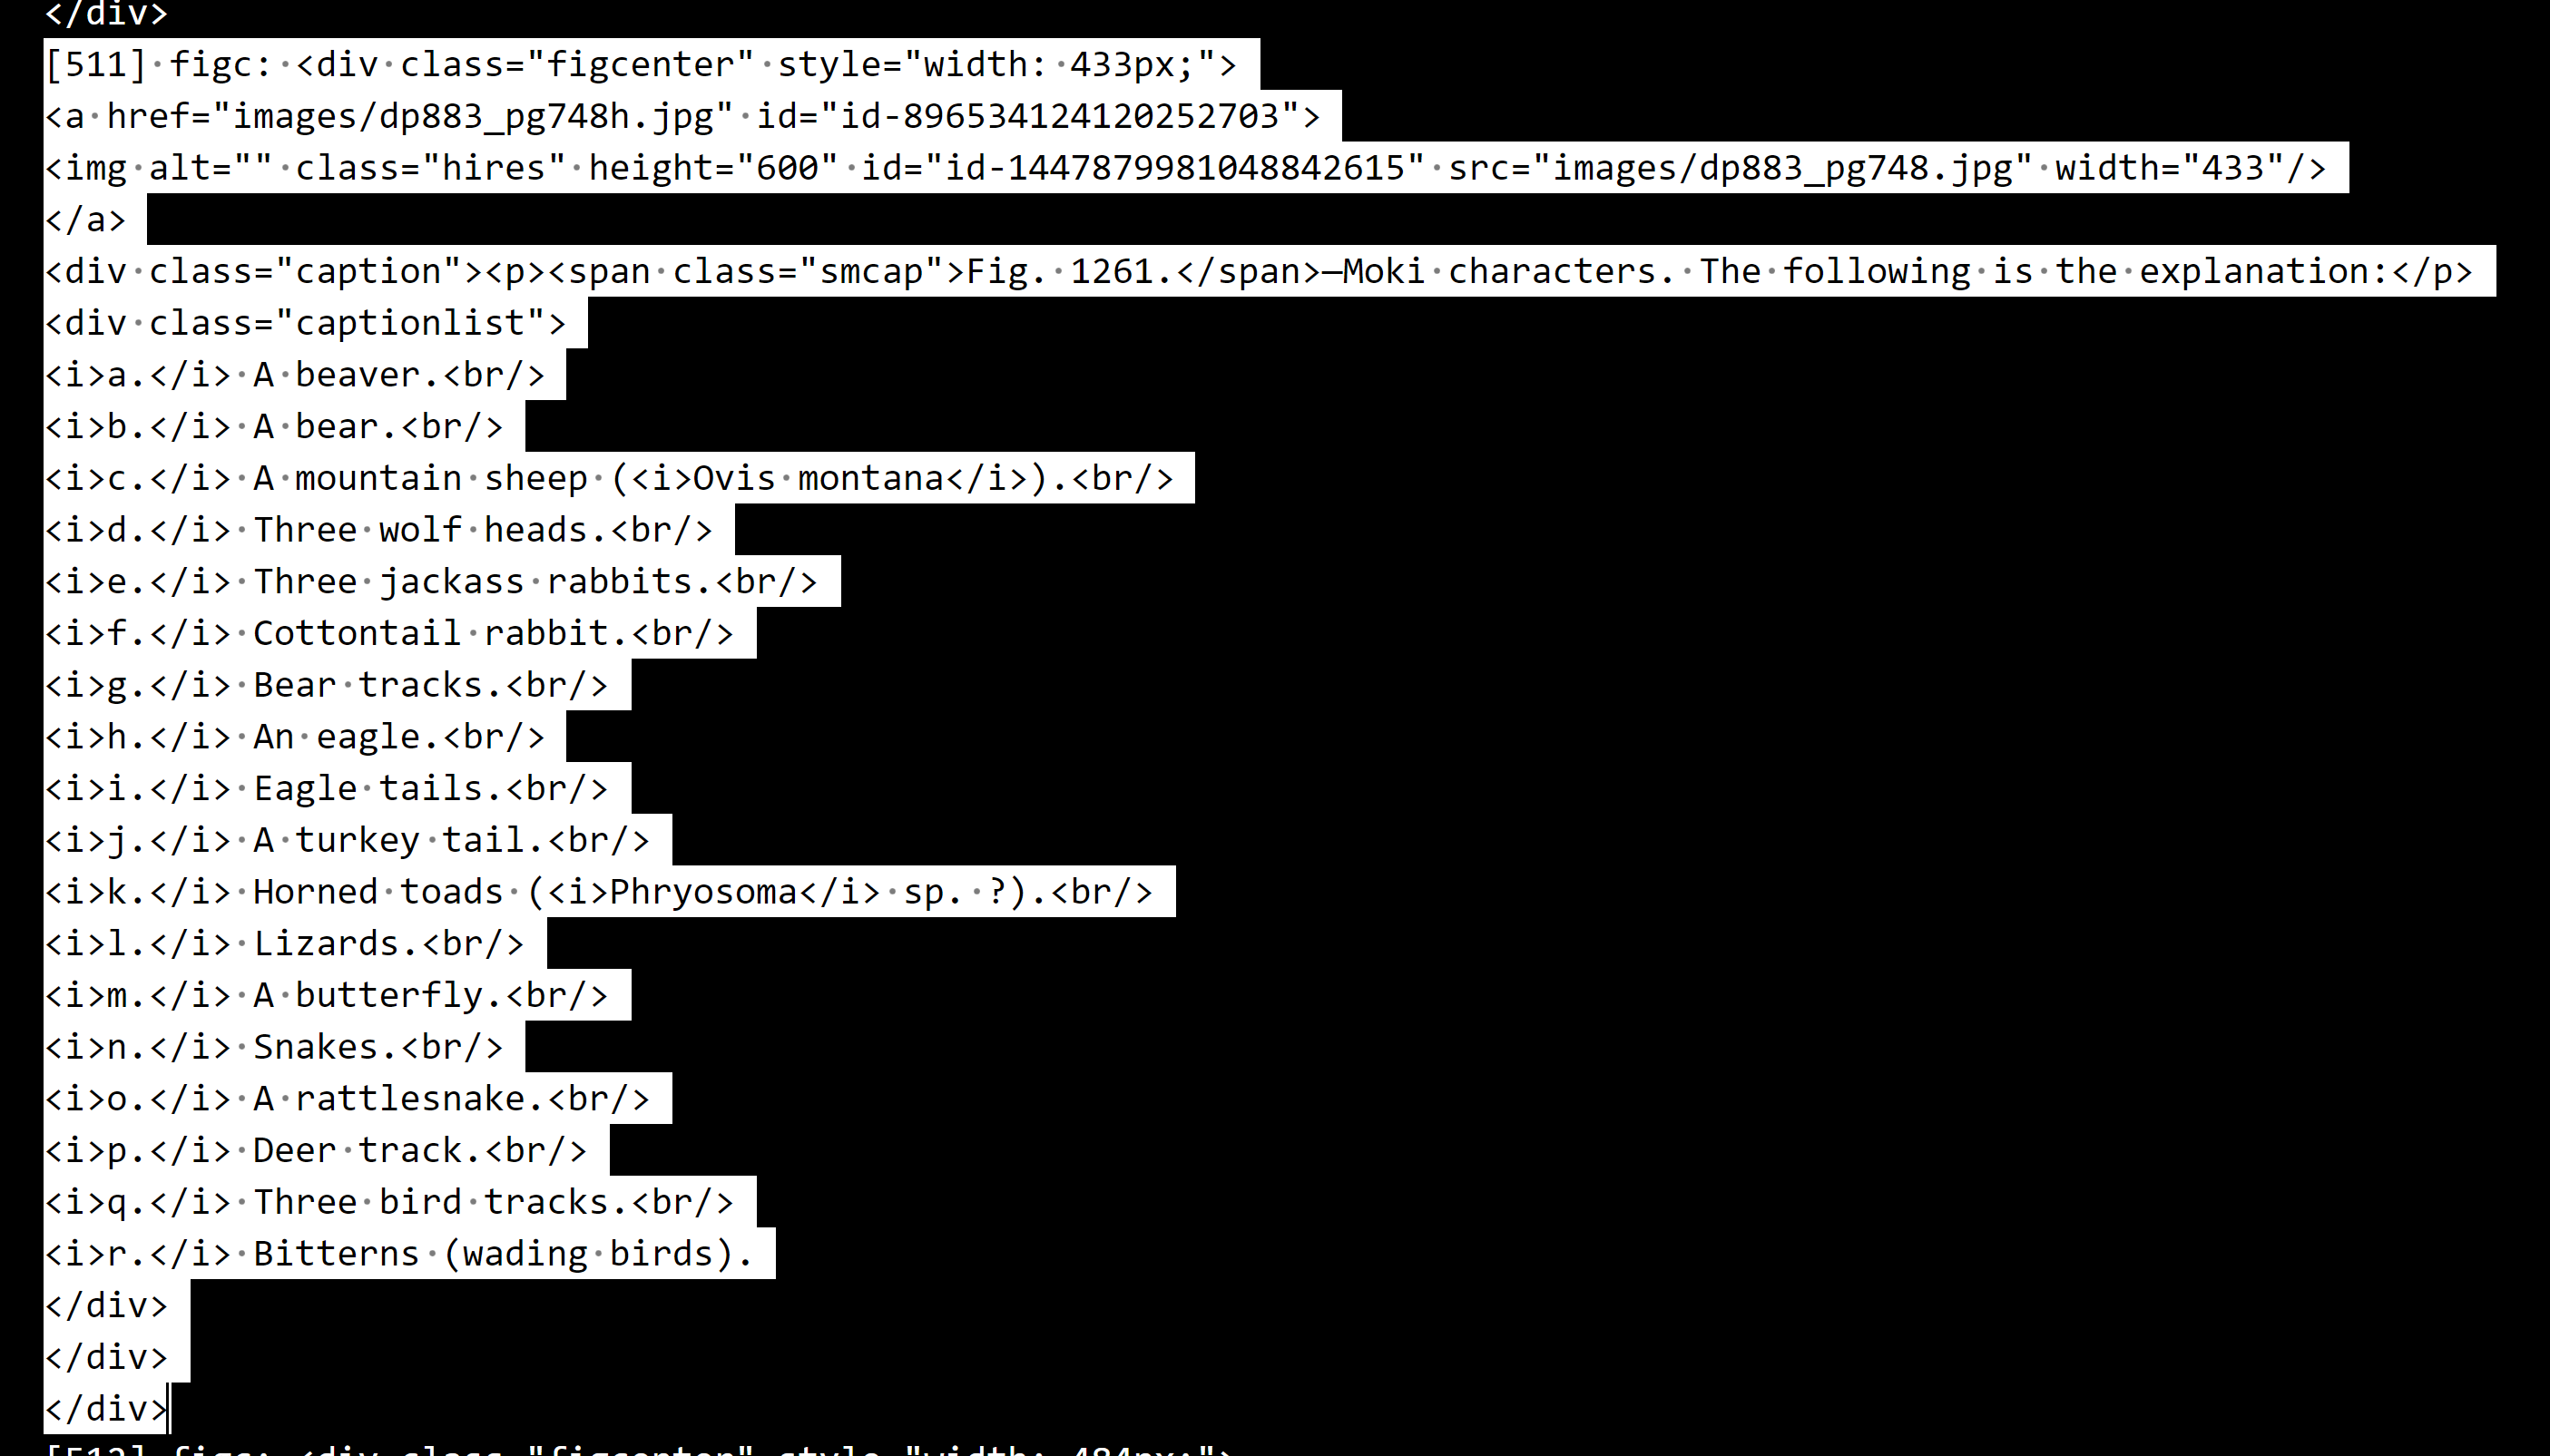
1. Another type: the signature:
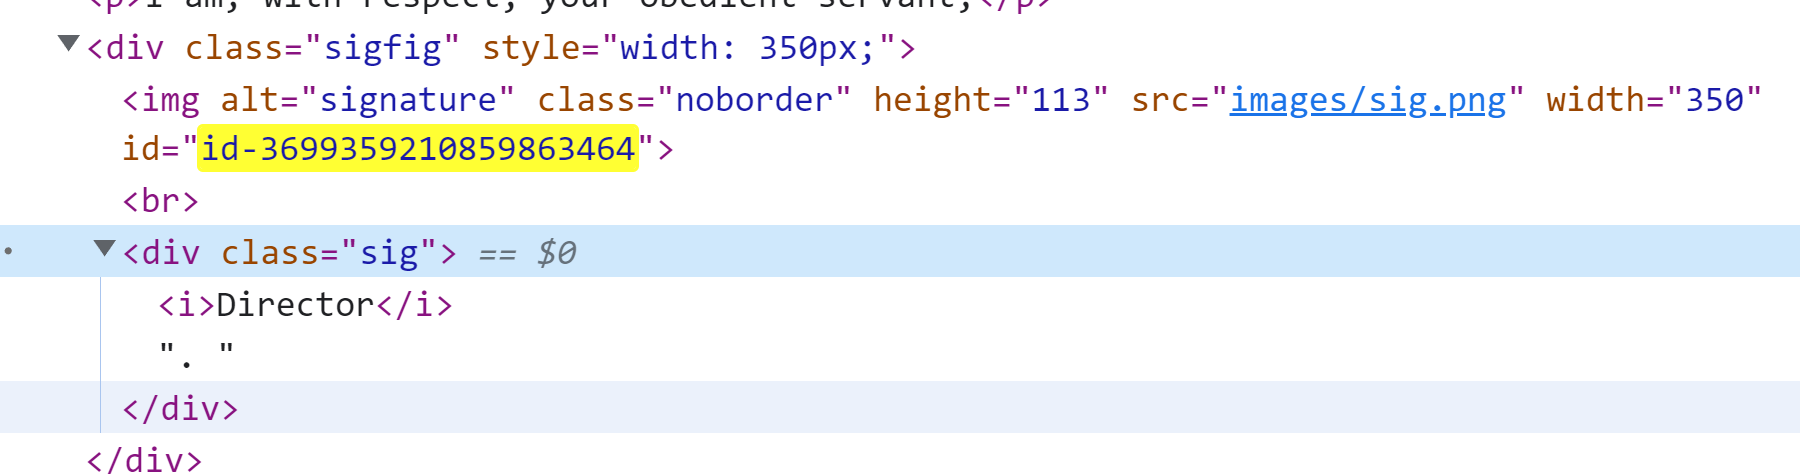
## Suggested heuristic for figures and images
1. search for known div classes: figcenter, figright, sigfig and process their structures with error handling
1. remove from the list of <img> elements those with known div classes. The remainder are loner images that we will just display based on timeline position. The subsequent divisions may or may not supply a caption in the audio feed / subtitle feed         
1. figcenter:  <img> element.parent.parent['class'] == 'figcenter'. The div class='caption' will be a child of element.parent.parent
1. figright: <img> element.parent['class'] == 'figright'.  The div class='caption' will be a child of the element.parent
1. sigfig: <img> element.parent['class'] == 'sigfig' The div class='sig' will be a child of the element.parent
1. all other <img> there is no caption.
1. instantiate all as Figure class, just leave the caption field or signature field blank as needed.


 


In [29]:
import jsonpickle
print('\n\nThis fetches all href images')


def qualify_href(tag):
    result = False
    c1 = False
    c2 = False
    if (tag.has_attr('href') and not tag.has_attr('class')):
        try:
            z = tag['href'].index(".png")
            c1 = True
        except:
            pass
            # idiot to throw exception from index functions duhhh
        try:
            z = tag['href'].index(".jpg")
            c2 = True
        except:
            pass
        result = c1 or c2
    return result

def qualify_caption(tag):
    c1 = False
    try:
        if (tag.has_attr('class')):
            if (tag['class'] == 'caption'):
                c1 = True
    except:
        pass            
    return c1

class ImageContent():
    def __init__(self, image):
        self.line = image.sourceline
        self.pos = image.sourcepos
        self.text = image['src']

class AllImages():
    def __init__(self, images, rootURL, URL):
        self.rootURL = rootURL
        self.URL = URL
        self.images = []
        for image in images:
            imageContent = ImageContent(image)
            self.images.append(imageContent)

    def dumpImagesToFile(self, fileName):
        rc = False
        try:
            jsonObject = jsonpickle.encode(self)
            with open(fileName, 'w', encoding='utf-8') as f:
                f.write(jsonObject)
            rc = True
        except:
            pass
        return rc                
            

hrefCount = 0
images_href = soup.find_all(qualify_href)
print("\n\n\n\nhref images\n\n\n")
for image in images_href:
    hrefCount = hrefCount + 1
    print(f"[{hrefCount}]: {repr(image)} -> {image['href']}  on sourceline {image.sourceline} position {image.sourcepos}")

imgCount = 0
images_src = soup.find_all('img')
allImages = AllImages(images_src, rootURL, URL)
print("\n\n\n\nsrc images\n\n\n")
# note need to add https://gutenberg.org/cache/epub/54653/images/dp607_pg511b.png
# to images/dp607_pg511b.png
for image in images_src:
    imgCount = imgCount + 1
    print(f"[{imgCount}]{repr(image)} -> {image['src']}  on sourceline {image.sourceline} position {image.sourcepos}")


print(f'images src {repr(images_src)}')


figcenters = soup.find_all(class_ = 'figcenter')

figcenter_count = 0
for figc in figcenters:
    figcenter_count = figcenter_count + 1
    print (f'[{figcenter_count}] figc: {repr(figc)}')

figrights = soup.find_all(class_ = "figright")
figrights_count = 0
for figr in figrights:
    figrights_count = figrights_count + 1
    print (f'[{figrights_count}] {repr(figr)}')


# there is also class sigfig                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

print (f'Images: {imgCount} Figcenters: {figcenter_count} Figrights: {figrights_count}')

#print (f">>>>>>>>>>>>>> STRINGS >>>>>>>>>>>")
#for string in soup.stripped_strings:
#    print(repr(string))




This fetches all href images




href images







src images



[1]<img alt="" height="150" id="id-5619650964189061645" src="images/i001.jpg" title="" width="124"/> -> images/i001.jpg  on sourceline 317 position 95
[2]<img alt="PLYMOUTH BAY, AS SEEN BY THE INDIANS." class="ispace" height="357" id="id-5260486638474831796" src="images/i003.jpg" title="" width="500"/> -> images/i003.jpg  on sourceline 333 position 147
[3]<img alt="THE FIRST ENCOUNTER." class="ispace" height="334" id="id-605916702300049029" src="images/i021.jpg" title="" width="500"/> -> images/i021.jpg  on sourceline 706 position 129
[4]<img alt="SAMOSET, THE INDIAN VISITOR." class="ispace" height="500" id="id-9000581647636617357" src="images/i043.jpg" title="" width="376"/> -> images/i043.jpg  on sourceline 1114 position 138
[5]<img alt="MASSASOIT AND HIS WARRIORS." class="ispace" height="371" id="id-3354671005870667534" src="images/i052.jpg" title="" width="500"/> -> images/i052.jpg  on sourceline 1270 position 137


# Region of Interest
In general we want to skip any elements inserted for Gutenberg license or transcriber's notes. A link to the original document should be sufficient for that.<br><br>
A heuristic for this could be developed, possibly a classifier network could be trained for identification of the excess elements.<br><br>
## Heuristics for identifying excess elements at the tail
1. "Transcriber's note" identifies the start of excess elements (tail)
1. *** END OF THE PROJECT GUTENBERG EBOOK
1. in one example ul class="index" identifies the start of index
1. in one examble div class="p4 transnote" identifies the start of transcribers notes.
1. in one example section class="pg-boilerplate pg-header" identifies the start of Gutenberg boilerplate

## Heuristics for identifying excess elements at the head
1. omit top material not in body /body element
1. parse the meta data for title and author
<br><br>


In [30]:
body = soup('body')
texts = soup.get_text()
print (texts)
start_tag = ''
end_tag = 'END OF THE PROJECT GUTENBERG'
start_tag = '*** START OF THE PROJECT GUTENBERG EBOOK'
start_index = 0
end_index = -1
try:
    end_index = texts.index(end_tag)
    texts = texts[:end_index]
    print (f'End index: {end_index}')
except:
    pass

try:
    start_index = texts.index(start_tag)
    start_index = start_index + start_tag.__len__
    texts = texts[start_index:]
    pass
except:
    pass

print(f'Text\n{texts}')





#pg-header div, #pg-footer div {
    all: initial;
    display: block;
    margin-top: 1em;
    margin-bottom: 1em;
    margin-left: 2em;
}
#pg-footer div.agate {
    font-size: 90%;
    margin-top: 0;
    margin-bottom: 0;
    text-align: center;
}
#pg-footer li {
    all: initial;
    display: block;
    margin-top: 1em;
    margin-bottom: 1em;
    text-indent: -0.6em;
}
#pg-footer div.secthead {
    font-size: 110%;
    font-weight: bold;
}
#pg-footer #project-gutenberg-license {
    font-size: 110%;
    margin-top: 0;
    margin-bottom: 0;
    text-align: center;
}
#pg-header-heading {
    all: inherit;
    text-align: center;
    font-size: 110%;
}
#pg-footer-heading {
    all: inherit;
    text-align: center;
    font-size: 120%;
    font-weight: normal;
    margin-top: 0;
    margin-bottom: 0;
}
#pg-header #pg-machine-header p {
    text-indent: -4em;
    padding-left: 4em;
    margin-top: 1em;
}
#pg-header #pg-header-authlist p {
    margin-left: -2em;
    margin-top: 0;
    

# how to keep the timeline intact by preserving line + position
See the below example
By traversing the tags, only pass to the TTS function those tags with no attributes
1. handle li -- strip for TTS
1. handle span -- strip for TTS
1. remove ul tags
1. here is a stinker
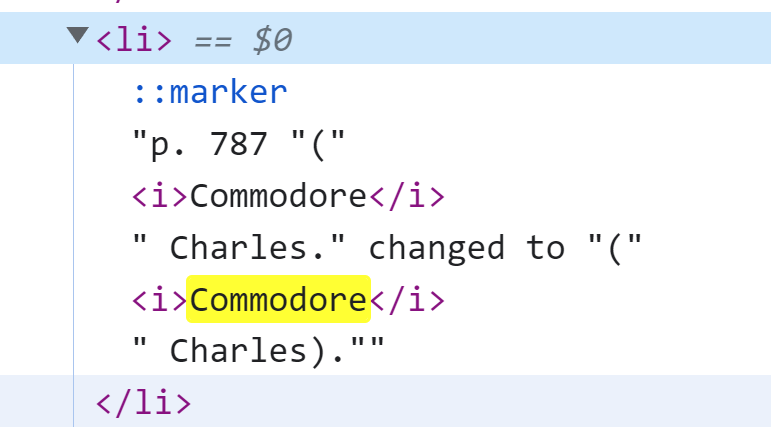
which parses as interleaved Tag and String<br>
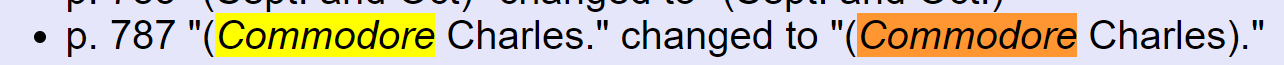

1. [<class 'bs4.element.Tag'>] [41133:3] None
1. <class 'bs4.element.NavigableString'> : p. 787 "(
1. [<class 'bs4.element.Tag'>] [41133:15] Commodore
1. <class 'bs4.element.NavigableString'> : Commodore
1. <class 'bs4.element.NavigableString'> :  Charles." changed to "(
1. [<class 'bs4.element.Tag'>] [41133:55] Commodore
1. <class 'bs4.element.NavigableString'> : Commodore
1. <class 'bs4.element.NavigableString'> :  Charles)."
1. [<class 'bs4.element.Tag'>] [41133:15] Commodore
1. <class 'bs4.element.NavigableString'> : Commodore
1. [<class 'bs4.element.Tag'>] [41133:55] Commodore
1. <class 'bs4.element.NavigableString'> : Commodore
1. [<class 'bs4.element.Tag'>] [41134:3] None



In [31]:


element_count = 0

tags = soup.find_all(True)

class Timeline():
    def __init__(self, startSequence = "*** START OF THE PROJECT GUTENBERG", endSequence = "*** END OF THE PROJECT GUTENBERG"):
        self.timeline_line = 0
        self.timeline_pos = 0
        self.contentStartTime = "[-1:-1]"
        self.contentEndTime = "[-1:-1]"
        self.contentStartLine = -1
        self.contentStartPos = -1
        self.contentEndLine = -1
        self.contentEndPos = -1
        self.startSequence = startSequence
        self.endSequence = endSequence   

    def setTimeLine(self, new_line, new_pos):
        noViolation = True
        if (new_line < self.timeline_line):
            print (f'LINE TIMELINE VIOLATION!!! new [{new_line}:{new_pos}] old [{self.timeline_line}:{self.timeline_pos}]')
            noViolation = False
        if (new_line == self.timeline_line and new_pos < self.timeline_pos):
            print (f'POS TIMELINE VIOLATION!!! new [{new_line}:{new_pos}] old [{self.timeline_line}:{self.timeline_pos}]')
            noViolation = False  
        if (noViolation == True):        
            self.timeline_line = new_line
            self.timeline_pos = new_pos
        return noViolation

    def printTimeLine(self):
        print (f'[{self.timeline_line}:{self.timeline_pos}]')

    def __str__(self):
        return f'line: {self.timeline_line} pos: {self.timeline_pos}'
    
    def __repr__(self):
        return f'[{self.timeline_line}:{self.timeline_pos}]'
    
    def checkStartSequence(self, candidate):
        if (self.startSequence in candidate):
            self.contentStartTime = repr(self)
            self.contentStartLine = self.timeline_line
            self.contentStartPos = self.timeline_pos
        if (self.endSequence in candidate):
            self.contentEndTime = repr(self)
            self.contentEndLine = self.timeline_line
            self.contentEndPos = self.timeline_pos

    def positionIsInContentWindow(self, line, pos):
        criterion = False
        if (line > self.contentStartLine and line < self.contentEndLine):
            criterion = True
        return criterion

class TTSContent():
    def __init__(self, line, pos, text):
        unes = html.unescape(text)
        unes = unes.replace('\n', ' -- ')
        unes = unes.replace('\\',' ')
        unes = unes.replace('/',' ')
        unes = unes.replace(':',' -- ')
        unes = unes.replace('*',' ')
        unes = unes.replace('?',' ')
        unes = unes.replace('"',' ')
        unes = unes.replace("'",'')
        unes = unes.replace('<',' ')
        unes = unes.replace('>',' ')
        unes = unes.replace('|',' ')        
        self.line = line
        self.pos = pos
        self.text = unes

        
    def __str__(self):
        print(f'[{self.line}:{self.pos}] {self.text}')

    def __repr__(self):
        print(f'[{self.line}:{self.pos}] {self.text}')       


class TTSCollector():
    def __init__(self):
        self.content = []

    def __str__(self):
         print(f'TTSCollector: {len(list(self.content))} content lines')
    
    def __repr__(self):
         print(f'TTSCollector: {len(list(self.content))} content lines')

    def getContent(self):
        return self.content
    
    def addContent(self, line, pos, text):
        tc = TTSContent(line, pos, text)
        self.content.append(tc)

    def dumpTextToFile(self, fname):
        rc = False
        try:
            with open(fname, 'w', encoding="utf-8") as f:
                for tc in self.content:
                    f.write(tc.text)
                    print(tc.line)
            rc = True
        except:
            print('Error in TTSCollector.dumpTextToFile')
        return rc
    
    def dumpContentToFile(self, fname):
        rc = False
        try:
            with open(fname, 'w', encoding="utf-8") as f:
                jsonContent = jsonpickle.encode(self)
                print(repr(jsonContent))
                f.write(jsonContent)
            rc = True
        except:
            print('Error in TTSCollector.dumpContentToFile')
        return rc    

timeline = Timeline()
print (f'Initial Timeline: {repr(timeline)}')

# try recursion
def traverse(rootTags, newIndent):
   # print (f'Traverse at {repr(timeline)}')
   for element in rootTags:
    # traverse(element)
    element_type = repr(type(element))
    # print (f'{element_type}')
    if (element_type != "<class 'bs4.element.Tag'>"):
        # these are bs4.element.NavigableString
        print (f'Level {newIndent}> {repr(timeline)} [{type(element)}] : {element.string}')
        timeline.checkStartSequence(element.string)
    else:
        if (timeline.setTimeLine(element.sourceline, element.sourcepos) == True):
            blob = element.string
            if (blob == None):
                blob = f'plus {len(list(element.descendants))} <descendants>'
            else:
                blob = f' ... see next Navigable string ...'
            print(f'Level {newIndent}> {repr(timeline)} [{type(element)}] ] [{element.name}] [attrs: {repr(element.attrs)}] {blob}')     
            # print (f'Contents {element.contents}')
            if (len(element.contents) != 0):
                traverse(element.contents, newIndent + 1)   
        else:
            print ('TERMINATING DUE TO TIMELINE VIOLATION BY TAG')
            break
    #print(f'{element.attrs} {element.string}')
    #if (len(element.attrs) == 0):
    #        if (element.string != None):
    #            print(f'[{element.sourceline}:{element.sourcepos}] {element.string}') 
# create line:position registered TTS input

traverse(tags, 0)
print (f'\n\n\n\n==== Start: {timeline.contentStartTime} End: {timeline.contentEndTime} =====================================\n\n\n\n\n')

print ('\n\n\n\n=========================================\n\n\n\n\n')        

Initial Timeline: [0:0]
Level 0> [2:15] [<class 'bs4.element.Tag'>] ] [html] [attrs: {'lang': 'en'}] plus 6980 <descendants>
Level 1> [3:5] [<class 'bs4.element.Tag'>] ] [head] [attrs: {}] plus 48 <descendants>
Level 2> [3:5] [<class 'bs4.element.NavigableString'>] : 

Level 2> [4:21] [<class 'bs4.element.Tag'>] ] [meta] [attrs: {'charset': 'utf-8'}] plus 0 <descendants>
Level 2> [4:28] [<class 'bs4.element.Tag'>] ] [style] [attrs: {}]  ... see next Navigable string ...
Level 3> [4:28] [<class 'bs4.element.NavigableString'>] : 
#pg-header div, #pg-footer div {
    all: initial;
    display: block;
    margin-top: 1em;
    margin-bottom: 1em;
    margin-left: 2em;
}
#pg-footer div.agate {
    font-size: 90%;
    margin-top: 0;
    margin-bottom: 0;
    text-align: center;
}
#pg-footer li {
    all: initial;
    display: block;
    margin-top: 1em;
    margin-bottom: 1em;
    text-indent: -0.6em;
}
#pg-footer div.secthead {
    font-size: 110%;
    font-weight: bold;
}
#pg-footer #projec

# Capture the text into timeline annotated TTS file


In [32]:
textCollector = TTSCollector()
collectTimeLine = Timeline()

def scanToCollector(rootTags):
   for element in rootTags:
    element_type = repr(type(element))
    if (element_type != "<class 'bs4.element.Tag'>"):
        # these are bs4.element.NavigableString --> render to collector (global instance of TTSCollector class
        if (timeline.positionIsInContentWindow(collectTimeLine.timeline_line, collectTimeLine.timeline_pos)):
            # print (f'Level {newIndent}> {repr(timeline)} [{type(element)}] : {element.string}')
            textCollector.addContent(collectTimeLine.timeline_line, collectTimeLine.timeline_pos, element.string)
    else:
        # these are Tags
        if (collectTimeLine.setTimeLine(element.sourceline, element.sourcepos) == True):
            if (len(element.contents) != 0):
                scanToCollector(element.contents)   
        else:
            # reached the end of content
            break

scanToCollector(tags)

content = textCollector.getContent()

for ttsContent in content:
    print(f'[{ttsContent.line}:{ttsContent.pos}] {ttsContent.text}')

textFileName = f'INCOMING/{bookTitle}.{bookAuthor}.txt'
rc = textCollector.dumpTextToFile(textFileName)
print(f'dumpTextToFile: {rc}')

contentFileName = f'CONTENT/{bookTitle}.{bookAuthor}.content.txt'
rc = textCollector.dumpContentToFile(contentFileName)
print(f'dumpContentToFile: {rc}')

imagesFileName = f'CONTENT/{bookTitle}.{bookAuthor}.images.txt'
rc = allImages.dumpImagesToFile(imagesFileName)
print(f'dumpImagesToFile: {rc}')




LINE TIMELINE VIOLATION!!! new [3:5] old [8352:4]
[300:12]  -- 
[301:2]  
[301:2]  -- 
[302:2] E-text prepared by D Alexander
[302:36]  --     and the Project Gutenberg Online Distributed Proofreading Team
[303:69]  --     (http --   www.pgdp.net)
[303:69]  -- 
[305:2]  
[305:2]  -- 
[306:16]  -- 
[307:2]  
[307:2]  -- 
[308:2]  
[308:2]  -- 
[309:2]  
[309:2]  -- 
[310:3] Makers of History
[310:3]  -- 
[311:16]  -- 
[312:3] King Philip
[312:3]  -- 
[313:23] By
[313:23]  JOHN S. C. ABBOTT
[313:23]  -- 
[314:17] WITH ENGRAVINGS
[314:17]  -- 
[315:19]  
[315:19]  -- 
[316:44]  -- 
[317:95]  -- 
[317:95]  -- 
[319:19]  
[319:19]  -- 
[320:17] NEW YORK AND LONDON
[320:40]  -- HARPER & BROTHERS PUBLISHERS
[321:35]  -- 1901 -- 
[321:35]  -- 
[324:17]  -- 
[325:17] Entered, according to Act of Congress, in the year one thousand eight
[325:90]  -- hundred and fifty-seven, by
[325:90]  -- 
[327:37] Harper & Brothers,
[327:37]  -- 
[328:17] in the Clerks office of the District Court of the South

# END